# Research Question




In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Introduction

### Source of Data: 

The data contains information from the 1990 California census.
This dataset is a modified version of the California Housing dataset available from: Luís Torgo's page (University of Porto).
And it is also available in the following URL link:
https://www.kaggle.com/camnugent/california-housing-prices

### Background Information: 

The dataset contains prices for houses found in given California districts and some summary stats about them based on the 1990 census data.
The goal in this analysis is to find out whether there are potential relationships between housing prices and other factors(i.e.house age, median_income, population, etc.), and predict the housing prices in California based on our model and the 2021 cencus.


### Ourtcome(Y) and Predictive Covariates(X):

Linear Regression Model:
Y: median_house_value
X_1: house_age
X_2: median_income
X_3: population


Camparing price per living space for each city in California:
Y: median_house_value
X: Ocean_proximity

## Cleaning Data

First off, we need to clean our data so that we could efficiently analyse them.


In [93]:
df_house = pd.read_csv('C:/Users/amber/Desktop/Eco225/Code/housing.csv')
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
df_house.shape

(20640, 10)

We have 20640 observations with 10 columns in the dataset.

Then, we need to check if there exists missing values in the dataset.

In [95]:
df_house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The result shows that there are 207 missing values existing in the "total_bedrooms" column.
Now, we will clean the data by dropping the uninterested column from the dataset.

In [118]:
df_house_clean = df_house.drop(["total_bedrooms","total_rooms","longitude", "latitude"], axis=1)
df_house_2 = df_house.drop(["total_bedrooms","total_rooms","longitude", "latitude", "population", "households","ocean_proximity","housing_median_age"], axis=1)
df_house_2

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


## Summary Statistics

Now we want to see the statistical details of the dataset.


In [119]:
df_house_clean.describe()

,housing_median_age,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,35682.000000,6082.000000,15.000100,500001.000000


## Method1: Simple Linear Regression

###  Goal: use multiple linear regression to predict the house value(measured in tens of thousands of US Dollars) in California based upon house median age, population, households, and median income(measured in US Dollars). 

### Plot of house value and house income, house age, population, and households:

Plot to see if there is a visible linear relations between house value and other covariances.

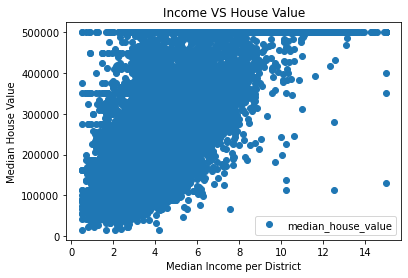

In [120]:
df_house_clean.plot(x='median_income', y='median_house_value', style='o')
plt.title('Income VS House Value')
plt.xlabel('Median Income per District')
plt.ylabel('Median House Value')
plt.show()

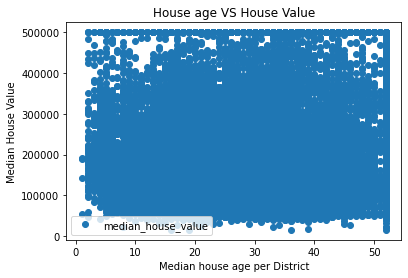

In [121]:
df_house_clean.plot(x='housing_median_age', y='median_house_value', style='o')
plt.title('House age VS House Value')
plt.xlabel('Median house age per District')
plt.ylabel('Median House Value')
plt.show()

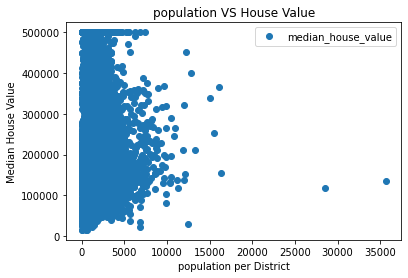

In [122]:
df_house_clean.plot(x='population', y='median_house_value', style='o')
plt.title('population VS House Value')
plt.xlabel('population per District')
plt.ylabel('Median House Value')
plt.show()

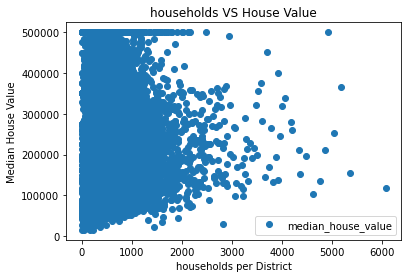

In [123]:
df_house_clean.plot(x='households', y='median_house_value', style='o')
plt.title('households VS House Value')
plt.xlabel('households per District')
plt.ylabel('Median House Value')
plt.show()

#### Through observing the above plots, there is a positive linear relation between house value and income.


### step1: preparing the data

First, we are going to divide the data into attributes and labels, and then use python to divide our data into training and test datasets.


In [124]:
X = df_house_2.iloc[:, :-1].values
y = df_house_2.iloc[:, 1].values

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### step2: calculate coefficients

Then, use the linear regression model to see the optimal coefficients for all the attributes.

In [126]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)

[42032.17769894]


### step3: Interpretation:
The above coefficient result means that for every one unit of change in income, the change in the house value is about 42032.17 dollars
Or in simpler words, if the median income in a district increases by 1,0000 dollars, they can expect the house value to achieve an increase of 42032.17 dollars compared to the previous house value.

###  step4: Making Predictions:

We make predictions on the test data, and then compare the actual data to the predicted data.

In [129]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,136900.0,218829.830598
1,241300.0,287249.809456
2,200700.0,227105.966387
3,72500.0,147345.705986
4,460000.0,254687.481393
...,...,...
4123,169500.0,148631.890623
4124,204600.0,228585.499042
4125,128600.0,178937.090744
4126,259500.0,302549.522139


### step5: Evaluating the Model:


In [131]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 84941.05152406936


You can see that the value of root mean squared error is 84941.05, which is much greater than 10% of the mean value(206855.82) of the house value in California. This means that our algorithm was not very accurate but can still make reasonably good predictions.

### Potential Questions with prediction:

There are many factors that may have contributed to this inaccuracy:
#### 1.Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
#### 2.Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. 

## Method: relations bt Y and X_2



## Plot of Y and X_2



## Summary



## Future Steps

